In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
# Read the dataset
df = pd.read_csv('heart_failure_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [51]:
# look for null values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [52]:
# check for data types
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [53]:
# set variables for logistic regression
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
# check shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((239, 12), (60, 12), (239,), (60,))

In [55]:
# logistic regression
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression()

In [56]:
LR_predict = LR_model.predict(X_test)

In [57]:
# prediction dataframe 
pd.DataFrame({'Actual': y_test, 'Predicted': LR_predict})

,Actual,Predicted
281,0,0
265,0,0
164,1,0
9,1,1
77,0,0
278,0,0
93,1,1
109,0,0
5,1,1
173,0,0


In [58]:
# check accuracy
LR_accuracy = accuracy_score(y_test, LR_predict)

# check confusion matrix
conf_mat = confusion_matrix(y_test, LR_predict)  

print(LR_accuracy)
print(conf_mat)

0.8
[[33  2]
 [10 15]]


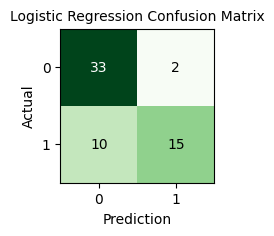

In [59]:
# plot confusion matrix
fig, ax = plot_confusion_matrix(conf_mat, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('Logistic Regression Confusion Matrix', fontsize = 10)
plt.show()

In [60]:
# naive bayes model
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [68]:
NB_predict = NB_model.predict(X_test)
NB_accuracy = accuracy_score(y_test, NB_predict)
#check accuracy
print(NB_accuracy)
print(confusion_matrix(y_test, NB_predict))

0.7333333333333333
[[34  1]
 [15 10]]


In [62]:
# prediction dataframe
pd.DataFrame({'Actual': y_test, 'Predicted': NB_predict})

,Actual,Predicted
281,0,0
265,0,0
164,1,0
9,1,1
77,0,0
278,0,0
93,1,0
109,0,1
5,1,1
173,0,0


In [63]:
# Define the ANN model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.2))

# Second hidden layer
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
# train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


6/6 [==============================] - 1s 37ms/step - loss: 0.8341 - accuracy: 0.3403 - val_loss: 0.7580 - val_accuracy: 0.4375
Epoch 2/50
6/6 [==============================] - 0s 11ms/step - loss: 0.7411 - accuracy: 0.4974 - val_loss: 0.6726 - val_accuracy: 0.5625
Epoch 3/50
6/6 [==============================] - 0s 8ms/step - loss: 0.6802 - accuracy: 0.5445 - val_loss: 0.6128 - val_accuracy: 0.7292
Epoch 4/50
6/6 [==============================] - 0s 8ms/step - loss: 0.6309 - accuracy: 0.6545 - val_loss: 0.5685 - val_accuracy: 0.8125
Epoch 5/50
6/6 [==============================] - 0s 10ms/step - loss: 0.6032 - accuracy: 0.7173 - val_loss: 0.5370 - val_accuracy: 0.7917
Epoch 6/50
6/6 [==============================] - 0s 10ms/step - loss: 0.5452 - accuracy: 0.7853 - val_loss: 0.5149 - val_accuracy: 0.8125
Epoch 7/50
6/6 [==============================] - 0s 10ms/step - loss: 0.5254 - accuracy: 0.7906 - val_loss: 0.4965 - val_accuracy: 0.8125
Epoch 8/50
6/6 [========================

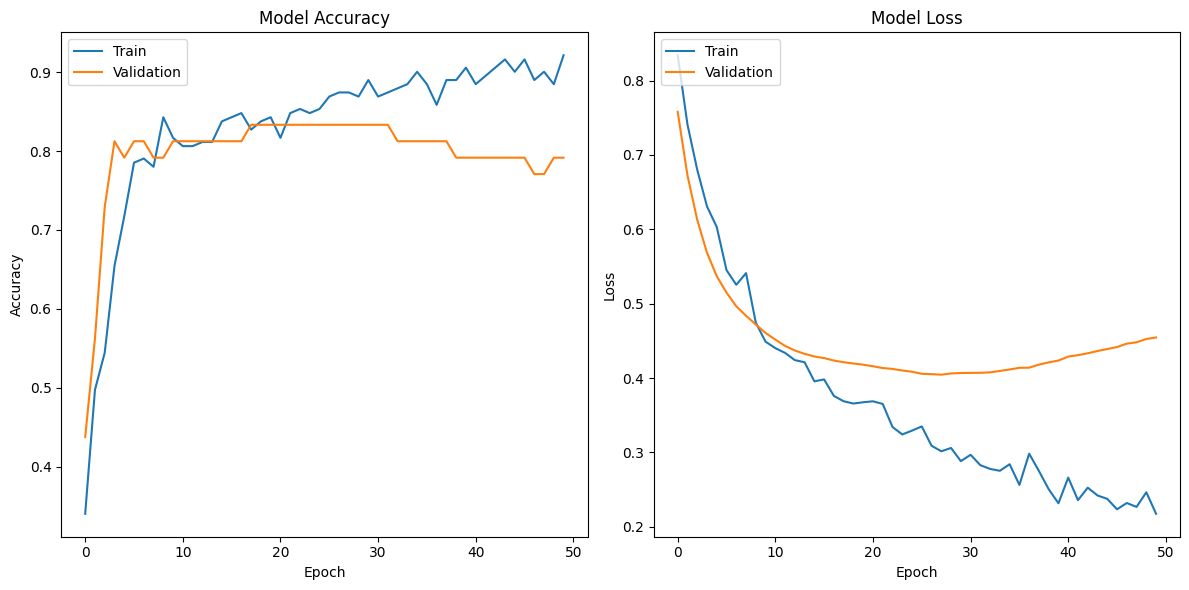

In [65]:
# plot accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()